# 기초 실행 코드

### xlsx -> csv 파일로 변환 (필요할 때 실행)

In [ ]:
import pandas as pd

# xlsx 파일 경로
xlsx_file_path = '/content/drive/MyDrive/Project_BeLife/data/clean_data.xlsx'

# csv 파일로 변환할 경로 및 파일 이름
csv_file_path = '/content/drive/MyDrive/Project_BeLife/data/clean_data.csv'

# xlsx 파일을 pandas DataFrame으로 읽기
df = pd.read_excel(xlsx_file_path)

# DataFrame을 csv 파일로 저장
df.to_csv(csv_file_path, index=False)

# 결과 출력
print(f"Conversion completed. CSV file saved at: {csv_file_path}")

### 나눔고딕 설치 (한 번 실행 후 런타임 재연결)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,805 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

# 데이터 불러오기

## 사용자 선호도평점 데이터 (rating_df)

In [1]:
import pandas as pd
import chardet # 자동으로 인코딩을 감지

# 사용자가 선호운동을 평가한 점수에 대한 테이블
# 현재는 각 사용자가 직접 선호도 값을 입력했다고 가정

with open('/content/drive/MyDrive/Project_BeLife/data/sample_data_ver2.csv', 'rb') as f:
    result_f = chardet.detect(f.read())

encoding = result_f['encoding']

rating_df = pd.read_csv('/content/drive/MyDrive/Project_BeLife/data/sample_data_ver2.csv', encoding=encoding)
rating_df.head()

,사용자,건강상태,운동목표,연령대,거주지,선호빈도,선호시간대,선호인원수,선호운동,장애유무,중요항목
0,1,대사증후군,심폐지구력향상,학생,양천구신정제3동,주2회,무관,무관,구기및라켓,무,거주지
1,2,대사증후군,심폐지구력향상,학생,강서구등촌제2동,주4회이상,오전,5명이하,구기및라켓,무,선호운동
2,3,관절질환,무관,노인,강남구대치제1동,주3회,무관,5명이하,구기및라켓,무,연령대
3,4,대사증후군,심폐지구력향상,성인,서초구반포제1동,주2회,오전,5명이상,구기및라켓,유,선호시간대
4,5,혈압질환,심폐지구력향상,학생,강북구송중동,주2회,오후,5명이상,민속,무,건강상태


In [2]:
# 고유한 값들을 출력할 열들의 리스트
print("<가중치 설정>")
columns_to_print = ['연령대', '장애유무', '중요항목', '선호운동', '건강상태', '운동목표', '선호빈도', '선호시간대', '선호인원수']

# 반복문을 사용하여 각 열의 고유한 값들 출력
for column in columns_to_print:
    unique_values = rating_df[column].unique()
    print(f"{column}의 고유한 값들:", unique_values)

<가중치 설정>
연령대의 고유한 값들: ['학생' '노인' '성인']
장애유무의 고유한 값들: ['무' '유']
중요항목의 고유한 값들: ['거주지' '선호운동' '연령대' '선호시간대' '건강상태' '장애유무' '운동목표' '선호인원수' '선호빈도']
선호운동의 고유한 값들: ['구기및라켓' '민속' '체력단련및생활운' '레저' '재활' '무용' '무도']
건강상태의 고유한 값들: ['대사증후군' '관절질환' '혈압질환' '해당없음' '디스크']
운동목표의 고유한 값들: ['심폐지구력향상' '무관' '근력향상' '체형교정']
선호빈도의 고유한 값들: ['주2회' '주4회이상' '주3회' '주1회']
선호시간대의 고유한 값들: ['무관' '오전' '오후' '저녁' '새벽']
선호인원수의 고유한 값들: ['무관' '5명이하' '5명이상']


### 가중치 부여를 위한 데이터 프레임 수치화 (rating_df_weighted)

In [3]:
import pandas as pd
import numpy as np

# 주어진 데이터프레임의 모든 값을 1로 설정
rating_df_weighted = rating_df.copy()
rating_df_weighted.iloc[:, 2:] = 1

# 데이터프레임 저장
rating_df_weighted.to_csv('/content/drive/MyDrive/Project_BeLife/data/rating_df_weighted.csv', index=False)

# 저장된 데이터프레임 확인
print(rating_df_weighted.head())

<ipython-input-3-423513f96fbb>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  rating_df_weighted.iloc[:, 2:] = 1


   사용자   건강상태  운동목표  연령대  거주지  선호빈도  선호시간대  선호인원수  선호운동  장애유무  중요항목
0    1  대사증후군     1    1    1     1      1      1     1     1     1
1    2  대사증후군     1    1    1     1      1      1     1     1     1
2    3   관절질환     1    1    1     1      1      1     1     1     1
3    4  대사증후군     1    1    1     1      1      1     1     1     1
4    5   혈압질환     1    1    1     1      1      1     1     1     1


### 컬럼별 가중치 부여 후 '평균평점' 새로운 컬럼 생성 후 데이터 프레임 저장 (rated_df_means)

- 중요항목 우선순위에 따른 가중치 k,l,m 으로 부여하는 코딩 작성 필요

In [4]:
import pandas as pd
import numpy as np

# Step 1: rating_df 불러오기

# Step 2: weighted_for_unique_values 적용 및 가중치 평균 계산
weighted_columns = ['연령대', '장애유무', '중요항목', '선호운동', '건강상태', '운동목표', '선호빈도', '선호시간대', '선호인원수']
weights = [1, 1, 2, 1, 2, 2, 1, 1, 1]

# 고유값들의 가중치 설정
weights_for_unique_values = {
    '연령대': {'학생': 1, '노인': 2, '성인': 3},
    '장애유무': {'무': 1, '유': 2},
    '중요항목': {'거주지': 1, '선호운동': 2, '연령대': 3, '선호시간대': 1, '건강상태': 2, '장애유무': 2, '운동목표': 1, '선호인원수': 1, '선호빈도': 1},
    '선호운동': {'구기및라켓': 1, '민속': 2, '체력단련및생활운': 3, '레저': 1, '재활': 2, '무용': 2, '무도': 1},
    '건강상태': {'대사증후군': 1, '관절질환': 2, '혈압질환': 3, '해당없음': 1, '디스크': 2},
    '운동목표': {'심폐지구력향상': 1, '무관': 2, '근력향상': 3, '체형교정': 1},
    '선호빈도': {'주2회': 1, '주4회이상': 2, '주3회': 3, '주1회': 1},
    '선호시간대': {'무관': 1, '오전': 2, '오후': 3, '저녁': 1, '새벽': 2},
    '선호인원수': {'무관': 1, '5명이하': 2, '5명이상': 3}
}

# rating_df에 가중치 적용
rating_df_weighted = rating_df.copy()
for column in weighted_columns:
    rating_df_weighted[column] = rating_df_weighted[column].map(weights_for_unique_values[column])

# 가중 평균 계산
rating_df_weighted['가중평균'] = (rating_df_weighted[weighted_columns] * weights).sum(axis=1) / sum(weights)

# Step 3: 가중 평균을 가장 마지막 컬럼으로 이동하고 rating_df_means 파일로 저장
weighted_columns.append('가중평균')
rating_df_means = rating_df_weighted[weighted_columns]

# 파일로 저장
rating_df_means.to_csv('/content/drive/MyDrive/Project_BeLife/data/rating_df_means.csv', index=False)

# Step 4: 최대, 최소 값 범위 출력
print("rating_df_means 데이터 프레임")
print(rating_df_means)
print("각 weighted_columns의 최대 값:")
print(rating_df_means[weighted_columns].max())
print("\n각 weighted_columns의 최소 값:")
print(rating_df_means[weighted_columns].min())


rating_df_means 데이터 프레임
     연령대  장애유무  중요항목  선호운동  건강상태  운동목표  선호빈도  선호시간대  선호인원수      가중평균
0      1     1     1     1     1     1     1      1      1  1.000000
1      1     1     2     1     1     1     2      2      2  1.416667
2      2     1     3     1     2     2     3      1      2  2.000000
3      3     2     1     1     1     1     1      2      3  1.500000
4      1     1     2     2     3     1     1      3      3  1.916667
..   ...   ...   ...   ...   ...   ...   ...    ...    ...       ...
995    2     1     1     3     2     3     1      2      3  2.000000
996    2     1     2     3     3     2     2      2      2  2.166667
997    3     2     1     2     2     1     3      1      2  1.750000
998    1     1     1     3     2     1     1      3      1  1.500000
999    2     2     3     1     1     3     2      2      1  2.000000

[1000 rows x 10 columns]
각 weighted_columns의 최대 값:
연령대      3.000000
장애유무     2.000000
중요항목     3.000000
선호운동     3.000000
건강상태     3.000000
운동목표  

### 컬럼별 모든 경우의 수 계산 (필요시 실행)

In [ ]:
import itertools

# weights_for_unique_values 딕셔너리
weights_for_unique_values = {
    '연령대': {'학생': 1, '노인': 2, '성인': 3},
    '장애유무': {'무': 1, '유': 2},
    '중요항목': {'거주지': 1, '선호운동': 2, '연령대': 3, '선호시간대': 1, '건강상태': 2, '장애유무': 2, '운동목표': 1, '선호인원수': 1, '선호빈도': 1},
    '선호운동': {'구기및라켓': 1, '민속': 2, '체력단련및생활운': 3, '레저': 1, '재활': 2, '무용': 2, '무도': 1},
    '건강상태': {'대사증후군': 1, '관절질환': 2, '혈압질환': 3, '해당없음': 1, '디스크': 2},
    '운동목표': {'심폐지구력향상': 1, '무관': 2, '근력향상': 3, '체형교정': 1},
    '선호빈도': {'주2회': 1, '주4회이상': 2, '주3회': 3, '주1회': 1},
    '선호시간대': {'무관': 1, '오전': 2, '오후': 3, '저녁': 1, '새벽': 2},
    '선호인원수': {'무관': 1, '5명이하': 2, '5명이상': 3}
}

# 가능한 조합 계산
possible_combinations = list(itertools.product(*(v.keys() for k, v in weights_for_unique_values.items())))

# 가능한 조합 출력
print("가능한 조합:")
for combination in possible_combinations:
    print(dict(zip(weights_for_unique_values.keys(), combination)))
print("총 가능한 조합의 수:", len(possible_combinations))


## 정제한 프로그램 현황 데이터 (clean_data_df)





In [5]:
with open('/content/drive/MyDrive/Project_BeLife/data/clean_data_ver3.csv', 'rb') as p:
    result_p = chardet.detect(p.read())

encoding = result_p['encoding']

clean_data_df = pd.read_csv('/content/drive/MyDrive/Project_BeLife/data/clean_data_ver3.csv', encoding=encoding)
clean_data_df = clean_data_df.drop(['성별', '시설주소','Unnamed: 8'], axis=1)
clean_data_df.head()

,시설명,종목명,프로그램명,대상,연령,장애,요일,시간,지번주소
0,G밸리보건지소,체력단련 및 생활운동,생활체조,3,4,1,월,10:00~11:20,서울 구로구 구로동 237
1,G밸리보건지소,체력단련 및 생활운동,헬스,0,1,1,화목,10:00~11:30,서울 구로구 구로동 237
2,가나안쉼터,체력단련 및 생활운동,세라밴드,3,4,1,월,10:30~11:20,서울 동대문구 전농동 602-29
3,가재울게이트볼구장,구기 및 라켓,게이트볼,4,1,2,수,10:40~11:20,서울특별시 노원구 중계동 515-4
4,가재울게이트볼구장,구기 및 라켓,게이트볼,4,1,2,월,10:10~11:50,서울특별시 노원구 중계동 515-4


# EDA

### 각 테이블 열 이름 확인

In [6]:
print("선호도 테이블 열 이름 확인:", rating_df.columns)
print("프로그램 정제 테이블 열 이름 확인:", clean_data_df.columns)

선호도 테이블 열 이름 확인: Index(['사용자', '건강상태', '운동목표', '연령대', '거주지', '선호빈도', '선호시간대', '선호인원수', '선호운동',
       '장애유무', '중요항목'],
      dtype='object')
프로그램 정제 테이블 열 이름 확인: Index(['시설명', '종목명', '프로그램명', '대상', '연령', '장애', '요일', '시간', '지번주소'], dtype='object')


### 각 테이블 고유 속성 정보

In [7]:
print("<rating_df>")
print("고유 사용자 수:", len(rating_df["사용자"].unique()))
print("선호하는 종목명 개수:", len(rating_df["선호운동"].unique()))
print("리스트:", rating_df["선호운동"].unique(), '\n')

print("<clean_data_df>")
print("실제 종목명 개수:", len(clean_data_df["종목명"].unique()))
print("리스트:", clean_data_df["종목명"].unique(), '\n')
print("실제 프로그램명 개수:", len(clean_data_df["프로그램명"].unique()))
print("리스트:", clean_data_df["프로그램명"].unique(), '\n')

<rating_df>
고유 사용자 수: 1000
선호하는 종목명 개수: 7
리스트: ['구기및라켓' '민속' '체력단련및생활운' '레저' '재활' '무용' '무도'] 

<clean_data_df>
실제 종목명 개수: 7
리스트: ['체력단련 및 생활운동' '구기 및 라켓' '무용' '무도' '레저' '재활' '민속'] 

실제 프로그램명 개수: 209
리스트: ['생활체조' '헬스' '세라밴드' '게이트볼' '농구' '댄스스포츠' '라틴댄스' '배드민턴' '벨리댄스' '에어로빅' '요가'
 '체조' '탁구' '테니스' '필라테스' '골프' '나이트댄스' '단전호흡' '댄스' '발레' '방송댄스' '수영' '아쿠아로빅'
 '웨이트로빅' '재즈댄스' '축구' '태극권' '태보' '한국무용' '라인댄스' '인라인' '재즈힙합' '태권도' '음악줄넘기'
 '공요가' '기구스트레칭' '라인살사댄스' '라인포크댄스' '라틴챠밍댄스' '모던댄스' '방송재즈댄스' '살사댄스' '선교무용'
 '스트레칭' '요가(임산부)' '우리춤체조' '웃음체조' '요가_하타' '검도' '배구' '스쿼시' '줄넘기' '풋살' '힙합댄스'
 '걷기' '선무도' '속성수영' '스포츠클라이밍' '실내야구' '다이어트댄스' '복싱' '아쿠아로빅(임산부)' '클럽댄스' '핼수'
 '특수체육' '리듬체조' '전통무용' '발레스트레칭' '사교댄스' '수영(임산부)' '줌바' '짐볼헬스' '피규어댄스' '헬스짐볼'
 '스피닝' '요가(산후)' '유도' '체육' '토구' '디스코' '라틴살사' '라켓볼' '스크린골프' '수영(60세 미만)'
 '수영(60세 이상)' '수영(65세 이상)' '택견' '헬스 ' '볼링' '수중재활' '스포츠팀' '운동발달' '치매예방운동'
 '댄스스포츠 ' '댄스스포츠(12개월)' '댄스스포츠(3개월)' '댄스스포츠(6개월)' '방송댄스(12개월)' '방송댄스(3개월)'
 '방송댄스(6개월)' '에어로빅(12개월)' '에어로빅(3개월)' '에어로빅(6개월)' '요가(3개월)'

## 학습용 데이터 프레임 만들기 (merged_df)
- 사용자(rating_df) + 프로그램명(clean_data_df) + 가중평균(rating_df_means)

In [12]:
import pandas as pd
import numpy as np

# 예시 데이터 생성 (사용자, 프로그램, 가중평균)
rating_df = pd.DataFrame({'사용자': range(1, 1001)})
clean_data_df = pd.DataFrame({'프로그램명': ['생활체조', '헬스', '세라밴드', '게이트볼', '농구', '댄스스포츠', '라틴댄스', '배드민턴', '벨리댄스', '에어로빅', '요가',
                                          '체조', '탁구', '테니스', '필라테스', '골프', '나이트댄스', '단전호흡', '댄스', '발레', '방송댄스', '수영', '아쿠아로빅',
                                          '웨이트로빅', '재즈댄스', '축구', '태극권', '태보', '한국무용', '라인댄스', '인라인', '재즈힙합', '태권도', '음악줄넘기',
                                          '공요가', '기구스트레칭', '라인살사댄스', '라인포크댄스', '라틴챠밍댄스', '모던댄스', '방송재즈댄스', '살사댄스', '선교무용',
                                          '스트레칭', '요가(임산부)', '우리춤체조', '웃음체조', '요가_하타', '검도', '배구', '스쿼시', '줄넘기', '풋살', '힙합댄스',
                                          '걷기', '선무도', '속성수영', '스포츠클라이밍', '실내야구', '다이어트댄스', '복싱', '아쿠아로빅(임산부)', '클럽댄스', '핼수',
                                          '특수체육', '리듬체조', '전통무용', '발레스트레칭', '사교댄스', '수영(임산부)', '줌바', '짐볼헬스', '피규어댄스', '헬스짐볼',
                                          '스피닝', '요가(산후)', '유도', '체육', '토구', '디스코', '라틴살사', '라켓볼', '스크린골프', '수영(60세 미만)',
                                          '수영(60세 이상)', '수영(65세 이상)', '택견', '헬스 ', '볼링', '수중재활', '스포츠팀', '운동발달', '치매예방운동',
                                          '댄스스포츠 ', '댄스스포츠(12개월)', '댄스스포츠(3개월)', '댄스스포츠(6개월)', '방송댄스(12개월)', '방송댄스(3개월)',
                                          '방송댄스(6개월)', '에어로빅(12개월)', '에어로빅(3개월)', '에어로빅(6개월)', '요가(3개월)', '요가(6개월)',
                                          '헬스(12개월)', '헬스(3개월)', '헬스(6개월)', '댄스스포츠_살사', '수상스키', '아쿠아로빅(관절염)', '에어댄스',
                                          '인라인하키', '티볼', '학교체육', '듀애슬론_자전거', '재즈발레', '철인수영', '댄스스포츠_부부', '레크댄스', '이지댄스',
                                          '한국무용_작품', '한국무용_타악', '소그룹수영', '소그룹수영(3개월)', '수영(3개월)', '아쿠아로빅(3개월)', '댄스로빅',
                                          '조깅', '특공무술', '당구', '야구', '스케이트', '스피트스케이트', '피겨스케이팅', '재활훈련', '실버스트레칭', '당구_포켓볼',
                                          '스키', '치어리더', '생활체육', '핀수영', '밸리댄스', '덤벨체조', '슛돌이축구', '매일요가', '스킨스쿠버', '수영헬스',
                                          '수중운동', '특수체육(저소득층)', '스노쿨링', '핼스', '스포츠댄스', '에어로빅(산후)', '에어로빅(임산부)', '검도 ',
                                          '코어운동', '공수도', '요가_반야사', '호신술', '아쿠아로빅_소그룹', '헬스GX', '게이트볼 ', '양궁', '우드볼', '덩더쿵체조',
                                          '맷돌체조', '챠밍댄스', '실내테니스', '볼륨댄스', '족구', '에스보드', '파워다이어트댄스', '보디빌딩', '국선도', '리권',
                                          '노르딕워킹', '아쿠아로빅_태보', '패키지', '자전거', '체육교실', '수구', '힙합방송댄스', '헬스(10회)', '헬스(2개월)',
                                          '헬스(4개월)', '유도_호신술', '스모비링', '수중관절', '재활', '재활_개인', '골프(3개월)', '나이트댄스(3개월)',
                                          '라인댄스(3개월)', '벨리댄스(3개월)', '스쿼시(3개월)', '스쿼시헬스', '스쿼시헬스(3개월)', '재즈댄스(3개월)',
                                          '필라테스(1개월)', '필라테스(3개월)', '한국무용(3개월)', '헬스(5개월)', '댄스테피아', '수영(관절염)', '요가_소그룹',
                                          '합기도', '아쿠아워킹', '국궁']})

# 랜덤한 가중평균 값 생성
rating_df_means = pd.DataFrame({'가중평균': np.round(np.random.uniform(1.0, 3.1, size=len(rating_df)), 1)})

# 테이블 생성
merge_df = pd.DataFrame({
    '사용자': np.repeat(rating_df['사용자'], len(clean_data_df)),
    '프로그램명': np.tile(clean_data_df['프로그램명'].tolist(), len(rating_df)),
    '가중평균': np.tile(rating_df_means['가중평균'].tolist(), len(clean_data_df))
})

# 파일로 저장
merge_df.to_csv('/content/drive/MyDrive/Project_BeLife/data/merge_df.csv', index=False)
merge_df


,사용자,프로그램명,가중평균
0,1,생활체조,2.3
0,1,헬스,1.2
0,1,세라밴드,1.2
0,1,게이트볼,1.9
0,1,농구,1.1
...,...,...,...
999,1000,수영(관절염),2.7
999,1000,요가_소그룹,2.2
999,1000,합기도,2.4
999,1000,아쿠아워킹,1.4


## 평점 분포 확인 그래프

### 그래프 그리기

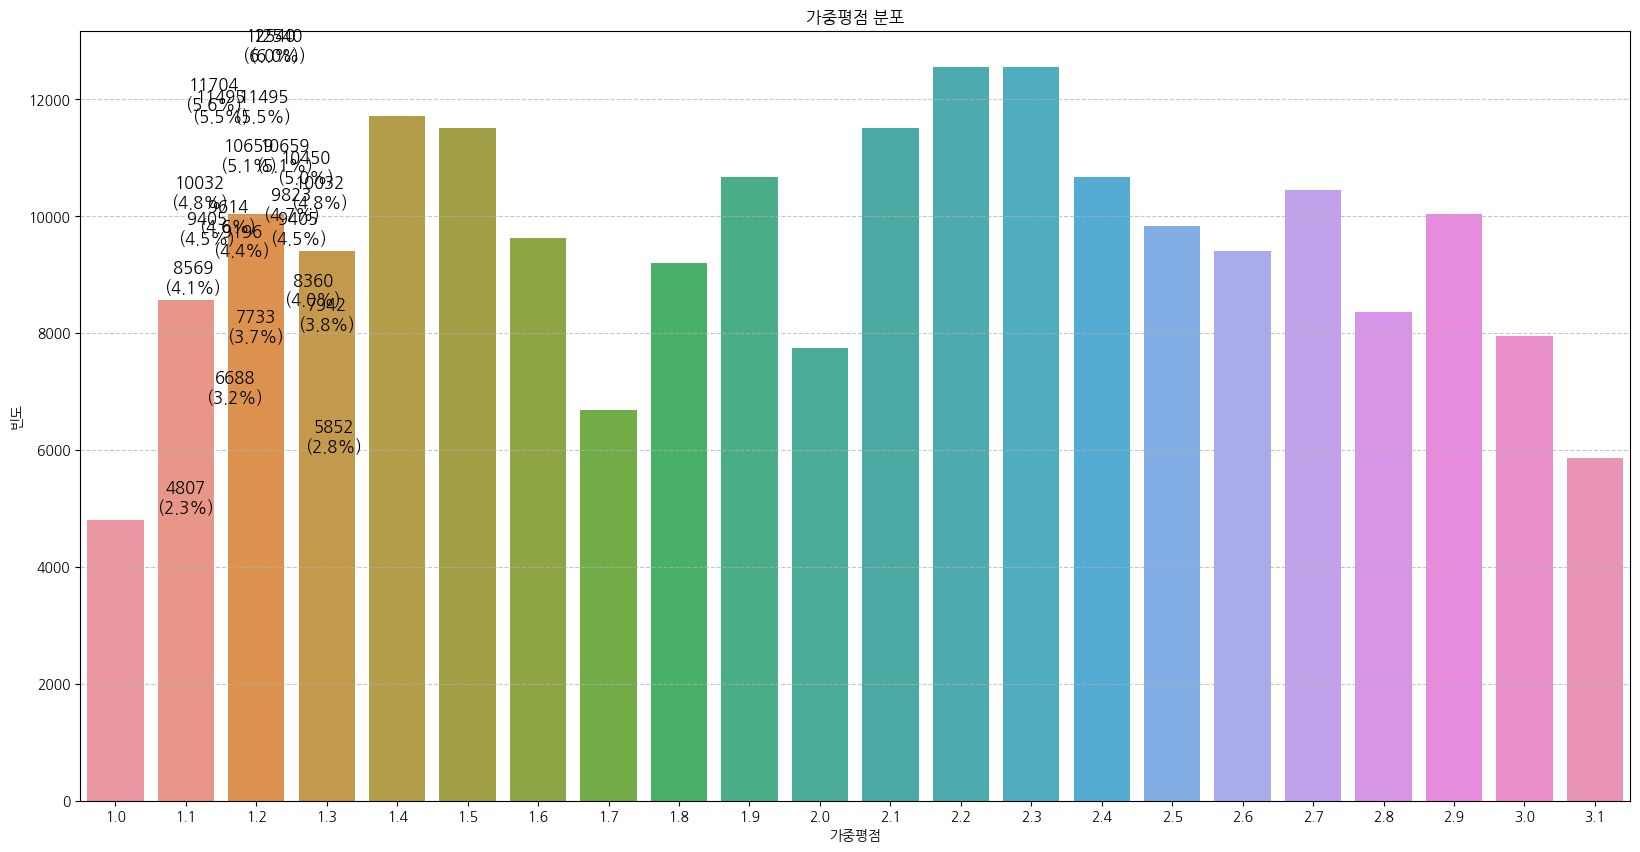

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 평점 순서 지정 (오름차순)
means_order = sorted(merge_df["가중평균"].unique())

# Seaborn countplot에 order 매개변수 추가
sns.countplot(x=merge_df["가중평균"], order=means_order)

# 그래프 꾸미기
object_cnt = merge_df["가중평균"].value_counts()


# 주석 추가
for x, y, z in zip(object_cnt.index, object_cnt.values, object_cnt.values / object_cnt.sum() * 100):
    # 값 인덱스 추가
    plt.text(x, y + 70, f"{y}\n({round(z, 2)}%)", ha='center', va='bottom', fontsize=12, color='black')




# x축, y축 레이블 추가
plt.xlabel("가중평점")
plt.ylabel("빈도")

# 그래프 제목 추가
plt.title("가중평점 분포")

# 그리드 표시
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()


# Matrix Factorization Modeling

- [필독] 수정 방향
  - 선호도 테이블 가중치를 반영한 평균평점의 id를 설정해야함: program_id
  - 모델 학습 속성 테이블 새로 저장 후 불러와야 함: 사용자id, 선호운동id(종목+프로그래명 병합), 평균평점

### SVD에 사용하는 surprise 패키지 설치 (한번만 실행)

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163493 sha256=f320e072904d75109c83d1f8641b7ed0f9670b3fc02dd99b445635e41a002f24
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## MF-based (SVD) 모델 학습

In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
import time


# Reader, Dataset 오브젝트로 학습용 데이터셋 생성 및 분리
reader = Reader(rating_scale=(5,10)) 	#1~5점 사이의 rating점수가 있다는 것을 알려줌
data = Dataset.load_from_df(rating_df["사용자","프로그램명","평균평점"], reader)
trainset, testset = train_test_split(data, test_size=0.25)


param_list = [10, 50, 100, 150, 200]
rmse_list_by_factors = []
ttime_list_by_factors = []

# n_factor depth에 따른 RMSE 확인
for n in param_list:
   train_start = time.time()
   algo = SVD(n_factors=n)
   algo.fit(trainset)
   train_end = time.time()
   print("모델 훈련 시간: %.2f 초" % (train_end - train_start))
   print(f"SVD 모델의 테스트 데이터셋 RMSE, n_factors={n}")

   # 모델 평가
   predictions = algo.test(testset)
   rmse_list_by_factors.append(accuracy.mse(predictions))
   ttime_list_by_factors.append(train_end - train_start)

   print("-"*20)

print("n_factors 탐색 완료.")

KeyError: ignored

## n_factor에 따른 RMSE 시각화

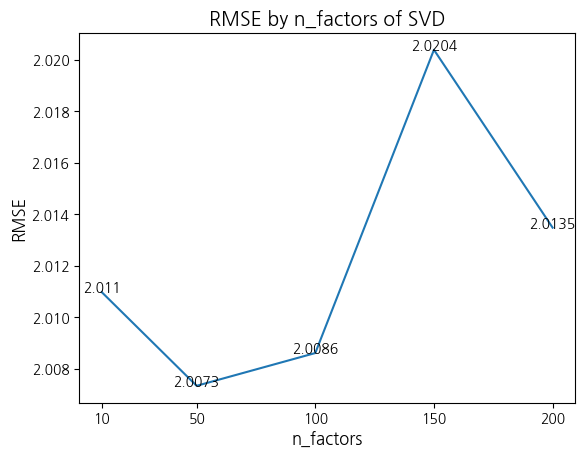

In [ ]:
import matplotlib.pyplot as plt

# plt의 plot 함수로 결과 시각화
plt.plot(param_list, rmse_list_by_factors)
plt.title("RMSE by n_factors of SVD", fontsize=14) # 평점수가 많을수록, RMSE 값은 작아지고, 값이 작을수록 정확도가 높음 (0.1~1.0 사이)
plt.xticks(param_list)
plt.xlabel("n_factors", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

for x, y in zip(param_list, rmse_list_by_factors):
    plt.annotate(f'{round(y, 4)}', xy=(x, y), textcoords="data", ha="center")

plt.show()

## 최종 RMSE 평가

In [ ]:
algo = SVD(n_factors=50, random_state=42)
algo.fit(trainset)
predictions = algo.test(testset)
acc = accuracy.rmse(predictions)
acc

RMSE: 1.3806


1.3806325746128372

## 실시간 업데이트를 고려해서 SVD 모델 학습 (사용자 등록 순서대로 진행)

In [ ]:
rating_df['사용자'].quantile(q=0.8, interpolation='nearest') # 8:2로 나눌 수 있는 사용자 기준탐색 ---> 800 (1000개 기준)

800

In [ ]:
train_df = rating_df[rating_df["사용자"]< 800][["사용자", "선호운동", "평균평점"]]
test_df = rating_df[rating_df["사용자"]>= 800][["사용자", "선호운동", "평균평점"]]

# 추출한 학습 데이터셋으로 SVD 모델 학습
data = Dataset.load_from_df(train_df, reader=reader)
train_data = data.build_full_trainset()

algo = SVD(n_factors=10)
algo.fit(train_data)

## 테스트 및 평가

In [ ]:
# 예측할 부분 (rating이 없는) 데이터만 추출
test_data = train_data.build_anti_testset()


predictions = algo.test(test_data)

# test 평가를 위해 선택하지 않은 프로그램의 예상 점수를 dictionary 형태로 추출
estimated_unselected_dict = {}

for uid, iid, _, predicted_rating, _ in predictions:
  if uid in estimated_unselected_dict:
    estimated_unselected_dict[uid].append((iid, predicted_rating))
  else:
    estimated_unselected_dict[uid] = [(iid, predicted_rating)]

# K파라미터 별 추천 결과 평가 및 시각화

In [ ]:
# user_watch_dict_list_test -> user_select_dict_list_test
# actual_watch_list  -> actual_select_list
# estimated_unwatched_dict -> estimated_unselected_dict
# remaining_movies -> remaining_programs

In [ ]:
# 사용자 정보를 담고 있는 DataFrame

# 전체 사용자 정보 참조/불러오기
user_select_dict_list_test = pd.DataFrame({
    '사용자': rating_df["사용자"],
    '선택한 선호운동': rating_df["선호운동"]
})

def get_map_topk(k):
    user_metric = []
    for user in estimated_unselected_dict:
        estimated_list = estimated_unselected_dict[user].copy()
        estimated_list.sort(key=lambda tup: tup[1], reverse=True)
        try:
            top_k_prefer_list = [program[0] for program in estimated_list[:k]]

            # user_select_dict_list_test가 DataFrame이고, index에 user가 존재하는지 확인
            if isinstance(user_select_dict_list_test, pd.DataFrame) and user in user_select_dict_list_test.index:
                actual_select_list = user_select_dict_list_test.loc[user].values.tolist()

                # 예측 값의 길이가 0인 경우 처리
                if len(top_k_prefer_list) == 0:
                    continue

                # top_k_prefer_list의 길이가 k보다 작은 경우 처리
                if len(top_k_prefer_list) < k:
                    remaining_programs = set(program[0] for program in estimated_list[k:]) - set(top_k_prefer_list)
                    top_k_prefer_list.extend(list(remaining_programs)[:k - len(top_k_prefer_list)])

                user_metric.append((user, top_k_prefer_list, actual_select_list))
            else:
                print(f"사용자 {user}에 대한 데이터가 올바르게 로드되지 않았습니다.")
        except Exception as e:
            print(f"사용자 {user}에 대한 오류: {str(e)}")
            # 필요한 대로 오류 처리

    precision_list = []
    for user in user_metric:
        predictive_values = user[1]
        actual_values = set(user[2])
        tp = [pv for pv in predictive_values if pv in actual_values]
        if len(predictive_values) > 0:
            precision = len(tp) / len(predictive_values)
            precision_list.append(precision)

    if len(precision_list) > 0:
        return sum(precision_list) / len(precision_list)
    else:
        return 0

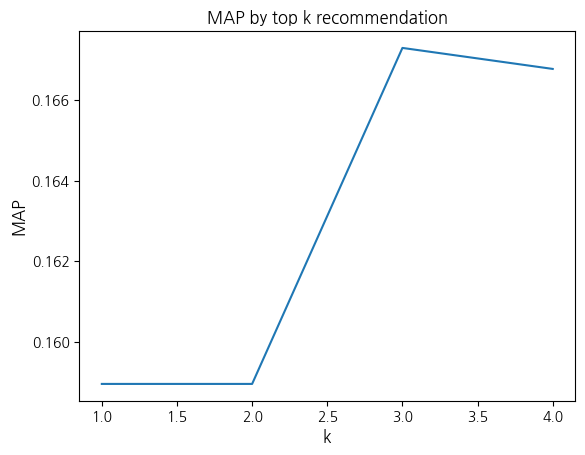

In [ ]:
k_param_list = range(1,5)
map_list = []
for k in k_param_list:
  map_list.append(get_map_topk(k))

plt.plot(k_param_list, map_list)
plt.title('MAP by top k recommendation')# 대부분 추천시스템의 MAP는 0.1~0.2 사이
plt.ylabel('MAP', fontsize=12)
plt.xlabel('k', fontsize=12)
plt.show()

# [필독] 추가 코드 작성 필요한 내용
- 선호운동 - 종목명 - 프로그램명 데이터 범주화 및 테이블 생성&저장 코드 작성
- 추천결과 데이터 프레임 확인
- 추천 결과 프린트

# [오픈AI 관련] 수정 방향 : 선호운동은 정제한 프로그램 현황 데이터와 연결 시켜야 함
- 새로운 사용자의 데이터 입력시 추천시스템 작동하게 하기
- 추천결과 내보내게 하기